In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# 设置
pd.options.display.notebook_repr_html=False  # 表格显示
plt.rcParams['figure.dpi'] = 75  # 图形分辨率
sns.set_theme(style='darkgrid')  # 图形主题

In [3]:
# 加载数据
flights=pd.read_csv(r'https://gitee.com/nicedouble/seaborn-data/raw/master/flights.csv')
flights

     year      month  passengers
0    1949    January         112
1    1949   February         118
2    1949      March         132
3    1949      April         129
4    1949        May         121
..    ...        ...         ...
139  1960     August         606
140  1960  September         508
141  1960    October         461
142  1960   November         390
143  1960   December         432

[144 rows x 3 columns]

In [4]:
mask1 = flights['year'] <= 1956
# mask2 = (flights['month'] == 'June') | (flights['month'] == 'November') | (flights['month'] == 'August') | (flights['month'] == 'October') 
mask2 = (flights['month'] == 'June') 
df = flights[mask1 & mask2]
df = df.rename(columns={'year': 'week', 'month': 'users', 'passengers': 'performance'})
df['week'] = df['week'].apply(lambda x: x % 11)
replace_dict_a = {'June': 'user A', 'November': 'user B', 'August':'user C', 'October':'user D'}
df['users'] = df['users'].replace(replace_dict_a)
df

    week   users  performance
5      2  user A          135
17     3  user A          149
29     4  user A          178
41     5  user A          218
53     6  user A          243
65     7  user A          264
77     8  user A          315
89     9  user A          374

/home/morris/swim/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/morris/swim/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/morris/swim/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/morris/swim/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

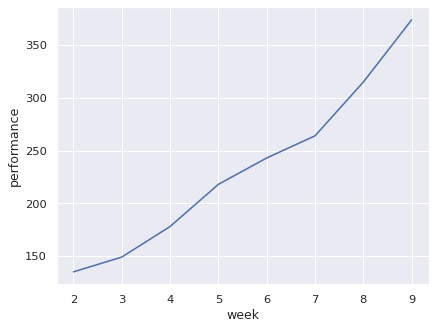

In [5]:
# 长型数据多折线图
sns.lineplot(data=df,x='week',y='performance')
plt.show()